In [2]:
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 31.2MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = "https://drive.google.com/open?id=1VwEFJH367Y0WCXpX0e1RKAgkKkld9qnB"

In [7]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1VwEFJH367Y0WCXpX0e1RKAgkKkld9qnB


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('preprocessed.csv') 
preprocessed_amazon_data = pd.read_csv('preprocessed.csv')

In [0]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)


In [0]:
preprocessed_amazon_data = preprocessed_amazon_data.dropna()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(preprocessed_amazon_data['preprocessed_reviews'].values,preprocessed_amazon_data['Values'].values,test_size=0.30,shuffle=False)

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 50000)
tokenizer.fit_on_texts(X_train)

In [0]:
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

In [0]:
max_review_length = 600
X_train_pad = sequence.pad_sequences(X_train_tok, maxlen=max_review_length)
X_test_pad = sequence.pad_sequences(X_test_tok, maxlen=max_review_length)

In [0]:
top_words = 50000
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 600, 32)           1600032   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,653,333
Trainable params: 1,653,333
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(X_train_pad, Y_train, nb_epoch=10, batch_size=64,validation_data=(X_test_pad,Y_test))
# Final evaluation of the model on test data
scores = model.evaluate(X_test_pad, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0727 05:55:30.350995 139930650638208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 73478 samples, validate on 31491 samples
Epoch 1/10
73478/73478 [==============================] - 1148s 16ms/step - loss: 0.2631 - acc: 0.8923 - val_loss: 0.3463 - val_acc: 0.8658
Epoch 2/10
73478/73478 [==============================] - 1144s 16ms/step - loss: 0.1470 - acc: 0.9457 - val_loss: 0.3056 - val_acc: 0.8975
Epoch 3/10
73478/73478 [==============================] - 1135s 15ms/step - loss: 0.1002 - acc: 0.9640 - val_loss: 0.2259 - val_acc: 0.9307
Epoch 4/10
73478/73478 [==============================] - 1136s 15ms/step - loss: 0.0713 - acc: 0.9757 - val_loss: 0.2625 - val_acc: 0.9358
Epoch 5/10
73478/73478 [==============================] - 1143s 16ms/step - loss: 0.0516 - acc: 0.9829 - val_loss: 0.2209 - val_acc: 0.9442
Epoch 6/10
73478/73478 [==============================] - 1138s 15ms/step - loss: 0.0380 - acc: 0.9872 - val_loss: 0.2358 - val_acc: 0.9488
Epoch 7/10
73478/73478 [==============================] - 1137s 15ms/step - loss: 0.0255 - acc: 0.9918 - val_l

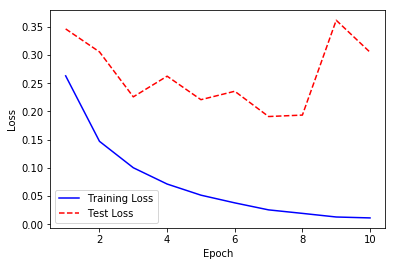

In [0]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'b-')
plt.plot(epoch_count, test_loss, 'r--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

disb:  In the given model we use embeeding layer and  layer with 100 LSTM, dense layer with sigmoid activation 

obs: model with LSTM 100 give the Accuray 96.23%

In [17]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

top_words=50000
embedding_vector_length = 40
model = Sequential()
model.add(Embedding(top_words+1, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(32,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(LSTM(16))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 40)           2000040   
_________________________________________________________________
lstm_3 (LSTM)                (None, 600, 32)           9344      
_________________________________________________________________
batch_normalization_3 (Batch (None, 600, 32)           128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 600, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 16)                3136      
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)                64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
__________

In [18]:
history = model.fit(X_train_pad, Y_train, nb_epoch=10, batch_size=64,validation_data=(X_test_pad,Y_test))
# Final evaluation of the model on test data
scores = model.evaluate(X_test_pad, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 73478 samples, validate on 31491 samples
Epoch 1/10
73478/73478 [==============================] - 2141s 29ms/step - loss: 0.3526 - acc: 0.8557 - val_loss: 0.7892 - val_acc: 0.6834
Epoch 2/10
73478/73478 [==============================] - 2099s 29ms/step - loss: 0.1701 - acc: 0.9409 - val_loss: 0.3275 - val_acc: 0.8801
Epoch 3/10
73478/73478 [==============================] - 2102s 29ms/step - loss: 0.1174 - acc: 0.9611 - val_loss: 0.3645 - val_acc: 0.8765
Epoch 4/10
73478/73478 [==============================] - 2069s 28ms/step - loss: 0.0851 - acc: 0.9730 - val_loss: 0.1859 - val_acc: 0.9531
Epoch 5/10
73478/73478 [==============================] - 2108s 29ms/step - loss: 0.0667 - acc: 0.9790 - val_loss: 0.1786 - val_acc: 0.9519
Epoch 6/10
73478/73478 [==============================] - 2103s 29ms/step - loss: 0.0499 - acc: 0.9853 - val_loss: 0.2525 - val_acc: 0.9372
Epoch 7/10
73478/73478 [==============================] - 2079s 28ms/step - loss: 0.0457 - acc: 0.9861 - val_l

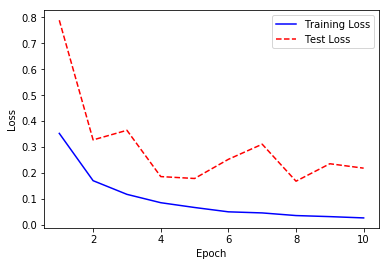

In [21]:
# Create count of the number of epochs
import matplotlib.pyplot as plt
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'b-')
plt.plot(epoch_count, test_loss, 'r--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

disb:  In the given model we use embeeding layer and  2 layer with 64 LSTM and 32 LSTM, dense layer with sigmoid activation 

obs: model with two layer of LSTM, one with LSTM 64 and another is 32 give the Accuray 95.97%